In [2]:
import numpy as np
import pymysql
import configparser
import json
import time
import matplotlib.pyplot as plt

In [9]:
ip = "139.199.102.41"
config = configparser.RawConfigParser()
config.readfp(open('../settings.cfg'))

dbname = config.get('jx3bla', 'username')
dbpwd = config.get('jx3bla', 'password')
db = pymysql.connect(ip,dbname,dbpwd,"jx3bla",port=3306,charset='utf8')
cursor = db.cursor()

d:\develop\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This method will be removed in future versions.  Use 'parser.read_file()' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
edition = "3.5.0"
mapdetail = "25人英雄范阳夜变"

sql = """SELECT * FROM ActorStat WHERE edition>='3.5.0' AND mapdetail='454'"""
cursor.execute(sql)
result = cursor.fetchall()

In [52]:
edition = "3.5.0"
mapdetail = "25人英雄敖龙岛"

sql = """SELECT * FROM ActorStat WHERE edition>='3.5.0' AND mapdetail='428'"""
cursor.execute(sql)
result = cursor.fetchall()

In [4]:
edition = "5.1.0"
mapdetail = "25人英雄达摩洞"

sql = """SELECT * FROM ActorStat WHERE edition>='%s' AND mapdetail='484' and win=1"""%edition
cursor.execute(sql)
result = cursor.fetchall()

In [68]:
print(result)

(('梦江南', '武雪散', '2020-11-14', '484', '5.3.3', '087fa710edc1a13650743bd4e3b66ee4', 1, "{'battleTime': 472, 'effectiveDPSList': [['吉吉屁啊哈哈', '9', 55157.84110169492], ['待会来我家睡@幽月轮', '6d', 84356.1377118644], ['红烧鸭鸭', '7m', 56804.27754237288], ['神奇李石竹', '211', 91897.84322033898], ['竹取辉映姬', '2d', 64809.52754237288], ['给我个枕头', '211', 95232.60805084746], ['专业小逗比', '1d', 84652.90042372882], ['空恋空', '1d', 64502.67796610169], ['中品万灵丹', '6d', 91210.79025423729], ['成都桥本环奈', '6d', 75734.26059322034], ['情深不授@乾坤一掷', '6d', 78435.13983050847], ['阿花蛋糕店', '5h', 0.0], ['心境@唯我独尊', '23', 92998.28813559322], ['云心梦', '4p', 67923.8686440678], ['素然倾城', '3t', 10755.811440677966], ['声鸾凤鸣', '22d', 96629.86440677966], ['钮祜禄忘川水', '10t', 11053.129237288136], ['姜婉晴', '5h', 0.0], ['活好不粘人', '25', 65278.351694915254], ['悸情的柒宝', '6h', 40.228813559322035], ['十律律', '21d', 101925.46822033898], ['鸽怼怼', '22h', 41448.063559322036], ['一梦繁华烬', '4m', 89862.06144067796], ['小妄书', '3d', 81261.0127118644], ['翊秋寒', '8', 54938.46822033898

In [5]:
bossDict = {}

for line in result:
    if line[1] not in bossDict:
        bossDict[line[1]] = []
    stat = json.loads(line[7].replace("'", '"'))
    for record in stat["effectiveDPSList"]:
        bossDict[line[1]].append(record)
        if line[4] < "5.3.0" and line[1] == "猿飞":
            bossDict[line[1]][-1][2] *= 0.5

In [6]:
def getColor(occ, light = 0):
    if occ[-1] in ['d', 't', 'h', 'p', 'm']:
        occ = occ[:-1]
    colorDict = {"0": (0, 0, 0), 
                 "1": (210, 180, 0),#少林
                 "2": (127, 31, 223),#万花
                 "4": (56, 175, 255),#纯阳
                 "5": (255, 127, 255),#七秀
                 "3": (160, 0, 0),#天策
                 "8": (255, 255, 0),#藏剑
                 "9": (205, 133, 63),#丐帮
                 "10": (253, 84, 0),#明教
                 "6": (63, 31, 159),#五毒
                 "7": (0, 133, 144),#唐门
                 "21": (180, 60, 0),#苍云
                 "22": (100, 250, 180),#长歌
                 "23": (71, 73, 166),#霸刀
                 "24": (195, 171, 227),#蓬莱
                 "25": (161, 9, 34),#凌雪
                 "211": (166, 83, 251),#衍天
                }
    if occ not in colorDict:
        occ = "0"
    a = colorDict[occ][0]/255
    b = colorDict[occ][1]/255
    c = colorDict[occ][2]/255
    if light == 1:
        a = (a + 1) / 2
        b = (b + 1) / 2
        c = (c + 1) / 2
    elif light == 2:
        n = a + b + c
        if n < 1.5:
            return (1, 1, 1)
        else:
            return (0, 0, 0)
    return (a, b, c)

97311.61995245164


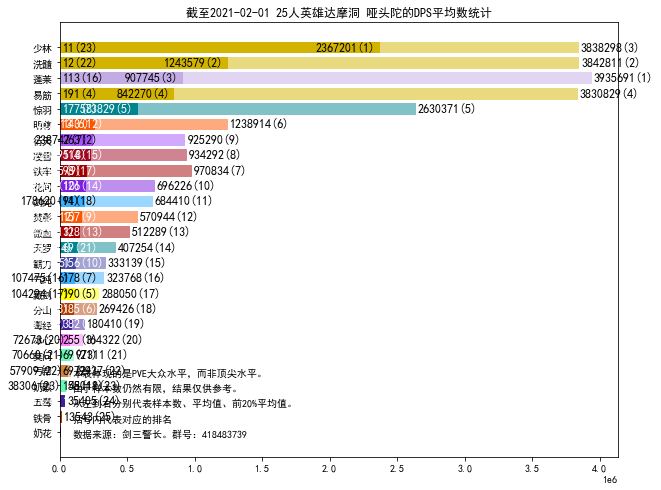

286643.53316316596


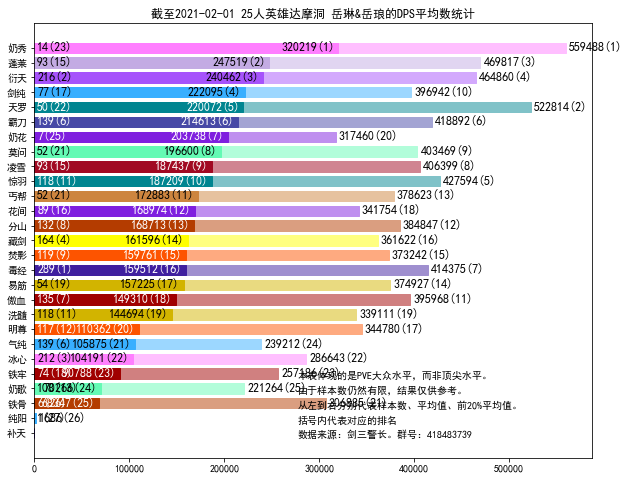

54474.55336922728


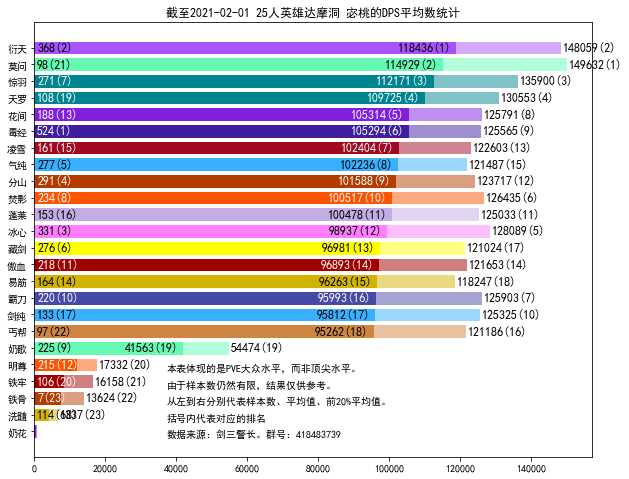

65887.39101497504


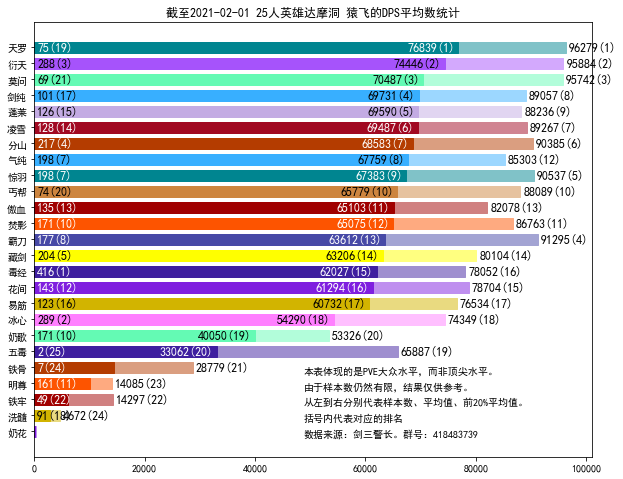

61535.6871994162


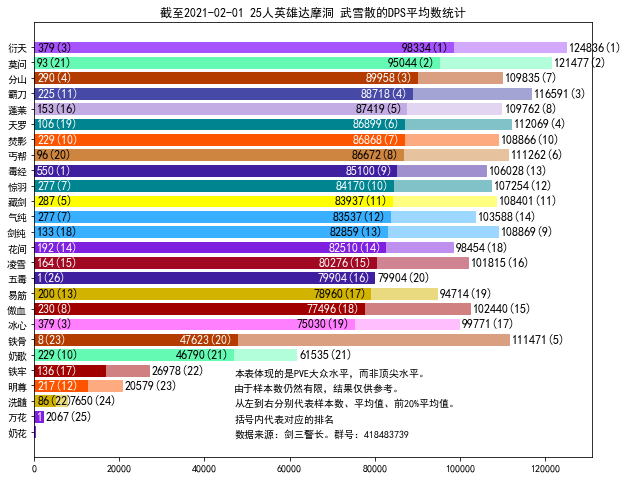

63699.902612826605


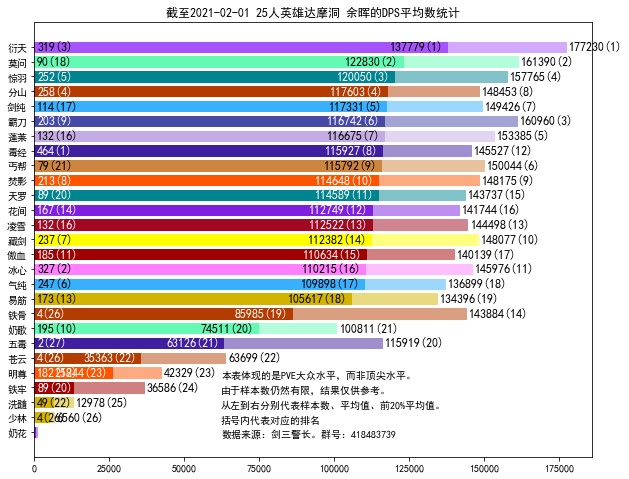

60413.950928381964


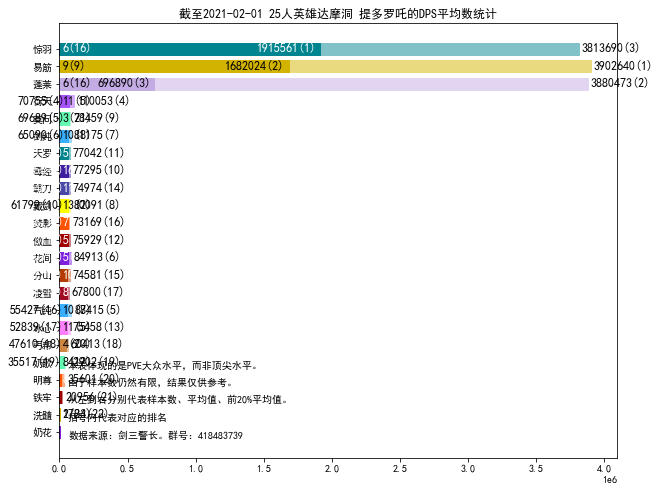

In [7]:
DPSpos = {"周贽": 2,
          "狼牙精锐": 2,
          "厌夜": 2,
          "迟驻": 5,
          "白某": 6,
          "安小逢": 2,
          "余晖": 2,
          "宓桃": 2,
          "武雪散": 2,
          "猿飞": 2,
          "哑头陀": 2,
          "岳琳&岳琅": 2,
          "提多罗吒": 2,
         }

occName = {"0": (0, 0, 0), 
     "1": "少林",
     "1d": "易筋",
     "1t": "洗髓",
     "2": "万花",
     "2d": "花间",
     "2h": "奶花",
     "4": "纯阳",
     "4p": "剑纯",
     "4m": "气纯",
     "5": "七秀",
     "5d": "冰心",
     "5h": "奶秀",
     "3": "天策",
     "3d": "傲血",
     "3t": "铁牢",
     "8": "藏剑",
     "9": "丐帮",
     "10": "明教",
     "10t": "明尊",
     "10d": "焚影",
     "6": "五毒",
     "6d": "毒经",
     "6h": "补天",
     "7": "唐门",
     "7p": "惊羽",
     "7m": "天罗",
     "21": "苍云",
     "21d": "分山",
     "21t": "铁骨",
     "22": "长歌",
     "22d": "莫问",
     "22h": "奶歌",
     "23": "霸刀",
     "24": "蓬莱",
     "25": "凌雪",
     "211": "衍天",
}

for name in bossDict:
    if name == "狼牙精锐":
        continue
    if name not in DPSpos:
        DPSpos[name] = 2
    allStat = bossDict[name]
    occDict = {}
    num = 0
    for line in allStat:
        if line[1] not in occDict:
            occDict[line[1]] = []
        if line[DPSpos[name]] > 100:
            occDict[line[1]].append(line[DPSpos[name]])
            num += 1
    table = []
    for occ in occDict:
        if len(occDict[occ]) > 0 and occ not in ['3', '7']:
            modifiedList = []
            if occ == "3d":
                for x in occDict[occ]:
                    if x > 20000:
                        modifiedList.append(x)
                data = np.array(modifiedList)
            else:
                modifiedList = occDict[occ]
                data = np.array(occDict[occ])
            modifiedList.sort(key = lambda x:-x)
            num = len(modifiedList) // 5
            if num == 0:
                num = 1
            dataTop10 = modifiedList[:num]
            dataTop10Np = np.array(dataTop10)
            res = [occ, occName[occ], data.shape[0], np.mean(data), np.median(data), np.max(data), np.min(data), np.mean(dataTop10Np)]
            table.append(res)
    table.sort(key = lambda x: x[3])
    #print("%s的面板DPS统计，样本数：%d"%(name, num))
    #for line in table:
    #    print(line)
        
    X = []
    Y = []
    C = []
    N = []
    Y2 = []
    C2 = []
    C3 = []
    plt.figure(figsize=(10,8))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    for line in table:
        X.append(line[1])
        Y.append(line[3])
        C.append(getColor(line[0], 0))
        N.append(line[2])
        Y2.append(line[7])
        C2.append(getColor(line[0], 1))
        C3.append(getColor(line[0], 2))
    barlist2 = plt.barh(X, Y2, height=0.7)
    barlist = plt.barh(X, Y, height=0.7)
    
    YR = []
    Y2R = []
    NR = []
    for i in range(len(Y)):
        n = 0
        for j in range(len(Y)):
            if Y[j] >= Y[i]:
                n += 1
        YR.append(n)
    for i in range(len(Y2)):
        n = 0
        for j in range(len(Y2)):
            if Y2[j] >= Y2[i]:
                n += 1
        Y2R.append(n)
    for i in range(len(N)):
        n = 0
        for j in range(len(N)):
            if N[j] >= N[i]:
                n += 1
        NR.append(n)
        
    for i in range(len(X)):
        barlist[i].set_color(C[i])
        barlist2[i].set_color(C2[i])
        if (Y[i] > 1000):
            plt.annotate("%d(%d)"%(N[i], NR[i]),  
            #(barlist[i].get_width(), barlist[i].get_y() + barlist[i].get_height()/2), ha = 'center', va = 'center', xytext = (10, 0), 
            (0, barlist[i].get_y() + barlist[i].get_height()/2), ha = 'left', va = 'center', xytext = (3, 0), 
            textcoords = 'offset points', fontsize = 12, color = C3[i])
        
        if (Y[i] > 1000):
            plt.annotate("%d(%d)"%(int(Y2[i]), Y2R[i]),  
            (barlist2[i].get_width(), barlist2[i].get_y() + barlist2[i].get_height()/2), ha = 'left', va = 'center', xytext = (3, 0), 
            textcoords = 'offset points', fontsize = 12, color = 'black')
        
        if (Y[i] > 20000):
            plt.annotate("%d(%d)"%(int(Y[i]), YR[i]),    
            (barlist[i].get_width(), barlist[i].get_y() + barlist[i].get_height()/2), ha = 'right', va = 'center', xytext = (-3, 0), 
            textcoords = 'offset points', fontsize = 12, color = C3[i])
    print(barlist2[5].get_width())
    plt.annotate("本表体现的是PVE大众水平，而非顶尖水平。", (barlist2[4].get_width() + 20000, barlist[4].get_y()))
    plt.annotate("由于样本数仍然有限，结果仅供参考。", (barlist2[4].get_width() + 20000, barlist[3].get_y()))
    plt.annotate("从左到右分别代表样本数、平均值、前20%平均值。", (barlist2[4].get_width() + 20000, barlist[2].get_y()))
    plt.annotate("括号内代表对应的排名", (barlist2[4].get_width() + 20000, barlist[1].get_y()))
    plt.annotate("数据来源：剑三警长。群号：418483739", (barlist2[4].get_width() + 20000, barlist[0].get_y()))
        
    bossID = {"余晖": 1, "宓桃":2, "武雪散": 3, "猿飞": 4, "哑头陀": 5, "岳琳&岳琅":6, "提多罗吒": 5}[name]
    plt.title('截至2021-02-01 %s %s的DPS平均数统计'%(mapdetail, name))
    plt.savefig("pt%d.png"%bossID)
    plt.show()

In [11]:
DPSpos = {"周贽": 2,
          "狼牙精锐": 2,
          "厌夜": 2,
          "迟驻": 5,
          "白某": 6,
          "安小逢": 2,
          "余晖": 2,
          "宓桃": 2,
          "武雪散": 2,
          "猿飞": 2,
          "哑头陀": 2,
          "岳琳&岳琅": 2,
         }

occName = {"0": (0, 0, 0), 
     "1": "少林",
     "1d": "易筋",
     "1t": "洗髓",
     "2": "万花",
     "2d": "花间",
     "2h": "奶花",
     "4": "纯阳",
     "4p": "剑纯",
     "4m": "气纯",
     "5": "七秀",
     "5d": "冰心",
     "5h": "奶秀",
     "3": "天策",
     "3d": "傲血",
     "3t": "铁牢",
     "8": "藏剑",
     "9": "丐帮",
     "10": "明教",
     "10t": "明尊",
     "10d": "焚影",
     "6": "五毒",
     "6d": "毒经",
     "6h": "补天",
     "7": "唐门",
     "7p": "惊羽",
     "7m": "天罗",
     "21": "苍云",
     "21d": "分山",
     "21t": "铁骨",
     "22": "长歌",
     "22d": "莫问",
     "22h": "奶歌",
     "23": "霸刀",
     "24": "蓬莱",
     "25": "凌雪",
     "211": "衍天",
}

resultDict = {}

sql = """DELETE FROM DpsStat WHERE mapdetail = "%s";"""%(
    mapdetail)
cursor.execute(sql)

for name in bossDict:
    if name == "狼牙精锐":
        continue
    if name not in DPSpos:
        DPSpos[name] = 2
    allStat = bossDict[name]
    occDict = {}
    num = 0
    for line in allStat:
        if line[1] not in occDict:
            occDict[line[1]] = []
        if line[DPSpos[name]] > 5000:
            if name == "安小逢":
                occDict[line[1]].append(line[2:9])
            else:
                occDict[line[1]].append(line[2:])
            num += 1
    table = []
    for occ in occDict:
        if occ in occName:
            if len(occDict[occ]) > 0:
                print(occDict[occ])
                data = np.array(occDict[occ], dtype = 'int32')
                res = [occ, occName[occ], data.shape[0]] +  list(np.mean(data, axis = 0))
                table.append(res)
                resultDict[occ] = res[1:]
     
    J = json.dumps(resultDict).replace('"', "'")
    sql = """INSERT INTO DpsStat VALUES ("%s", "%s", "%s")"""%(
        mapdetail, name, J)
    cursor.execute(sql)
    db.commit()
            
    table.sort(key = lambda x: -x[3])
    print("%s的面板DPS统计，样本数：%d"%(name, num))
    print(resultDict)


[[85328.56289707751], [99510.4480600751], [55070.02628285357], [53820.95297029703], [65145.0283464567], [66904.59821428571], [73397.32020330368], [70539.3125794155], [89929.38959390864], [76231.34798994975], [49803.610322580644], [55288.55118110236], [76684.76788124157], [53059.66176470588], [62985.77078085642], [60240.37533512065], [85698.97468354431], [65410.31481481482], [60005.04336734694], [94266.026957638], [45036.692019950126], [94252.72284122562], [74929.27855153203], [62234.5842985843], [77450.32793017456], [57015.74683544304], [82187.39300134589], [54669.27518427518], [75581.58230958231], [93075.66915052161], [81996.6368221942], [36088.04329608939], [119225.66666666667], [54859.24], [78450.66916354556], [46368.13233458177], [90715.6670967742], [71674.99249061327], [94266.026957638], [57190.50681536555], [63473.8605230386], [48187.13574097136], [84193.73901464714], [83768.86099290781], [80668.90082644628], [120497.62630792227], [79843.79875], [75823.8875], [54325.495639534885]

岳琳&岳琅的面板DPS统计，样本数：2646
{'7m': ['天罗', 50, 220072.34], '4p': ['剑纯', 77, 222095.14285714287], '10t': ['明尊', 117, 110361.76068376069], '5d': ['冰心', 212, 104190.75471698113], '6d': ['毒经', 289, 159512.42906574396], '8': ['藏剑', 164, 161596.1219512195], '21d': ['分山', 132, 168713.27272727274], '2d': ['花间', 89, 168974.50561797753], '3d': ['傲血', 142, 142792.9295774648], '211': ['衍天', 216, 240461.7685185185], '7p': ['惊羽', 118, 187209.04237288135], '25': ['凌雪', 93, 187436.64516129033], '23': ['霸刀', 139, 214613.345323741], '4m': ['气纯', 139, 105875.02158273381], '22h': ['奶歌', 108, 70265.92592592593], '10d': ['焚影', 119, 159760.53781512604], '1d': ['易筋', 54, 157224.8148148148], '22d': ['莫问', 52, 196599.88461538462], '3t': ['铁牢', 74, 90788.43243243243], '24': ['蓬莱', 93, 247519.39784946237], '21t': ['铁骨', 6, 68347.0], '9': ['丐帮', 52, 172883.17307692306], '1t': ['洗髓', 90, 188724.44444444444], '1': ['少林', 8, 3254475.25], '6': ['五毒', 1, 35405.0], '7': ['唐门', 2, 74782.5], '5h': ['奶秀', 14, 320218.5714285714],

ValueError: setting an array element with a sequence.

In [50]:
cursor.execute("DROP TABLE IF EXISTS DpsStat")

sql = """CREATE TABLE DpsStat (
         mapdetail VARCHAR(32), 
         boss VARCHAR(32), 
         statistics VARCHAR(16000)
         ) DEFAULT CHARSET utf8mb4"""
cursor.execute(sql)

db.commit()

In [30]:
J = json.dumps(resultDict)

In [28]:
s = json.loads(J)
print(s)

{'22': ['长歌', 101, 77103.32673267326, 15.841584158415841, 112.32673267326733, 74870.80198019803], '21': ['苍云', 324, 82945.78703703704, 12.018518518518519, 77.1574074074074, 81087.79012345678], '8': ['藏剑', 377, 73233.59151193633, 10.456233421750664, 101.62068965517241, 71841.36339522546], '2': ['万花', 332, 69922.1656626506, 15.5, 291.2469879518072, 67951.6295180723], '4': ['纯阳', 445, 65923.30337078651, 15.87191011235955, 229.58876404494382, 63979.02471910112], '6': ['五毒', 413, 69450.7167070218, 16.854721549636803, 328.58837772397095, 67297.50605326876], '5': ['七秀', 534, 63092.65730337079, 18.762172284644194, 511.44756554307116, 60951.050561797754], '7': ['唐门', 483, 71960.15113871636, 17.014492753623188, 152.0248447204969, 69733.85507246378], '3': ['天策', 269, 71562.57620817843, 14.0, 165.4163568773234, 69752.3940520446], '10': ['明教', 189, 70892.16931216931, 12.783068783068783, 140.46560846560845, 69236.69312169313], '1': ['少林', 183, 69959.80327868853, 11.387978142076502, 281.7868852459016